# Pandas 1

## Content

- Introduction to Pandas
- DataFrame & Series
- Creating DataFrame from Scratch (Post-read)
- Basic ops on a DataFrame
- Basic ops on Columns
    - Accessing column(s)
    - Check for unique values
    - Rename column
    - Deleting column(s)
    - Creating new column(s)
- Basic ops on Rows
    - Implicit/Explicit index
    - Indexing in Series
    - Slicing in Series
        - loc/iloc
    - Indexing/Slicing in DataFrame


## **Introduction to Pandas**

### Pandas Installation



In [3]:
# !pip install pandas    -- remove hashtag and run this command if pandas is not installed in your system

### Importing Pandas

- You should be able to import Pandas after installing it.
- We'll import `pandas` using its **alias name `pd`**.

In [4]:
import pandas as pd
import numpy as np

### Why use Pandas?

- The major **limitation of numpy** is that it can only work with one datatype at a time.
- Most real-world datasets contain a mix of different datatypes.
  - **names of a place would be string**
  - **population of a place would be int**
  
It is difficult to work with data having **heterogeneous values** using Numpy.

On the other hand, Pandas can work with numbers and strings together.


### Problem Statement

- Imagine that you are a Data Scientist with McKinsey.
- McKinsey wants to understand the relation between GDP per capita and life expectancy for their clients.
- The company has obtained data from various surveys conducted in different countries over several years.
- The acquired data includes information on
  - Country
  - Population Size
  - Life Expectancy
  - GDP per Capita
- We have to analyse the data and draw inferences that are meaningful to the company.

**Now how should we read this dataset?**

Pandas makes it very easy to work with these kinds of files.

In [5]:
df = pd.read_csv('mckinsey.csv') # storing the data in df
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


### DataFrame and Series

**What can we observe from the above dataset?**

We can see that it has:
- 6 columns
- 1704 rows

**What do you think is the datatype of `df` ?**

In [6]:
type(df)

pandas.core.frame.DataFrame

It is a **Pandas DataFrame**

#### What is a Pandas DataFrame?

- A DataFrame is a **table-like (structured)** representation of data in Pandas.
- Considered as a **counterpart of 2D matrix** in Numpy.



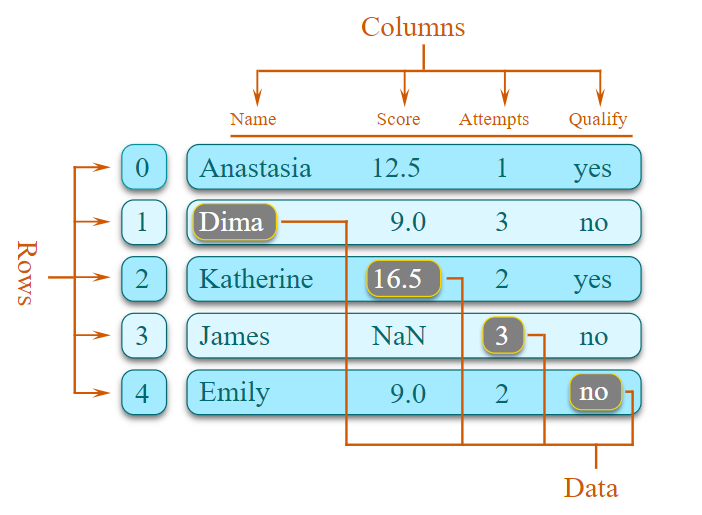

In [7]:
from IPython.display import Image
Image(filename='download.png')


**How can we access a column, say `country` of the dataframe?**

In [8]:
df["country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

As you can see, we get all the values present in the **country** column.

**What is the data-type of a column?**

In [9]:
type(df["country"])

pandas.core.series.Series

It is a **Pandas Series**

#### What is a Pandas Series?
- A **Series** in Pandas is what a **Vector** is in Numpy.

**What exactly does that mean?**
- It means that a Series is a **single column of data**.
- Multiple Series are stacked together to form a DataFrame.



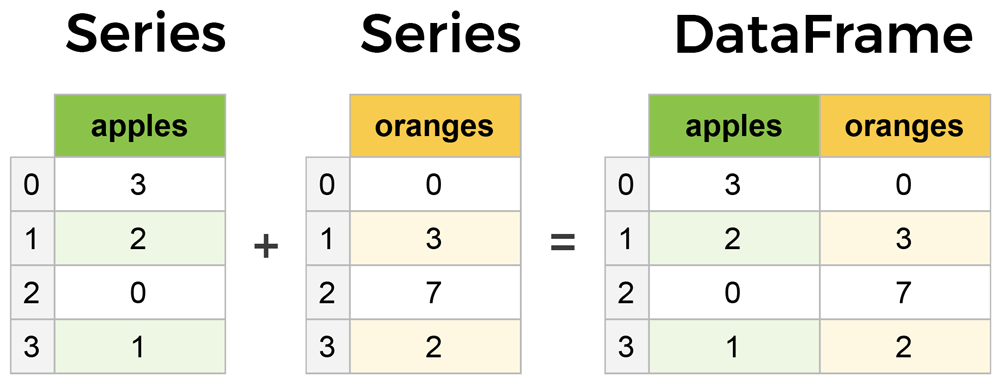

In [10]:
from IPython.display import Image
Image(filename='series.png')


Now we have understood what Series and DataFrame are.

**How can we find the datatype, name, total entries in each column?**


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


`df.info()` gives a list of columns with:

- **Name** of columns
- **How many non-null values (blank cells)** each column has.
- **Type of values** in each column - int, float, etc.

**By default**, it shows **Dtype** as `object` for anything other than **int or float**.

**What if we want to see the first few rows in the dataset?**

In [12]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


**`df.head()` prints the top 5 rows by default.**

We can also pass in number of rows that we want to see.


In [13]:
df.head(10)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


Similarly, we can use **`df.tail()` if we wish to see the last few rows**.

In [14]:
df.tail()

,country,year,population,continent,life_exp,gdp_cap
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


**How can we find the shape of a dataframe?**





In [15]:
df.shape

(1704, 6)

Similar to Numpy, it gives the **no. of rows and columns**.


## **Basic operations on Columns**


**What operations can we do using columns?**

- Add a column
- Delete a column
- Rename a column

We can see that our dataset has 6 columns.

**How can we get the names of all these cols?**

We can do it in two ways:
1. `df.columns`
2. `df.keys`

In [16]:
df.columns  # using attribute `columns` of dataframe

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

In [17]:
df.keys()  # using method `keys()` of dataframe

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

**Note:**
- Here, `Index` is a type of Pandas class used to store the `address` of the series/dataframe.
- It is an immutable sequence used for indexing.

**How can we access these columns?**

In [18]:
df['country'].head()  # accessing a single column

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [19]:
df[['country', 'life_exp']].head() # accessing multiple columns

,country,life_exp
0,Afghanistan,28.801
1,Afghanistan,30.332
2,Afghanistan,31.997
3,Afghanistan,34.020
4,Afghanistan,36.088


**And what if we pass a single column name?**

In [20]:
df[['country']].head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


**Note:**
- Notice how this output type is different from our earlier output using `df['country']`
- `['country']` gives a Series while `[['country']]` gives a DataFrame.

**How can we find the countries that have been surveyed?**

We can find the unique values in the `country` column.

In [21]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

**What if you also want to check the count of occurence of each country in the dataframe?**

In [22]:
df['country'].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

**Note:** `value_counts()` shows the output in **decreasing order of frequency**.

**What if we want to change the name of a column?**

We can rename the column by
- passing the dictionary with `old_name:new_name` pair
- specifying `axis=1`

In [23]:
df.rename({"population": "Population", "country":"Country" }, axis = 1)

,Country,year,Population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


Alternatively, we can also rename the column
- without specifying `axis`
- by using the `column` parameter



In [24]:
df.rename(columns={"country":"Country"})

,Country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


If we try and check the original dataframe `df` -

In [25]:
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


We can clearly see that the column names are still the same and have not changed.

The changes doesn't happen in original dataframe unless we specify a parameter called `inplace` as True.

In [26]:
df.rename({"country": "Country"}, axis = 1, inplace = True)
df

,Country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


**Note**
- `.rename` has default value of axis=0
- If two columns have the **same name**, then `df['column']` will display both columns.

There's another way of accessing the column values.

In [27]:
df.Country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: Country, Length: 1704, dtype: object

This however doesn't work everytime.

**What do you think could be the problem here?**

- If the column names are **not strings**
  - Starting with **number**: e.g. `2nd`
  - Contains a **whitespace**: e.g. `Roll Number`
- If the column names conflict with **methods of the DataFrame**
  - e.g. `shape`

We already know the continents in which each country lies.

So we probably don't need this column.

**How can we delete columns from a dataframe?**


In [28]:
df.drop('continent', axis=1)

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


The `drop()` function takes two parameters:
- column name
- axis
  
By default, the value of `axis` is 0.

An alternative to the above approach is using the "columns" parameter as we did in `rename()`.

In [29]:
df.drop(columns=['continent'])

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


As you can see, the column `contintent` is dropped.

**Has the column been permanently deleted?**

In [30]:
df.head()

,Country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


No, the column `continent` is still there in the original dataframe.

**Do you see what's happening here?**

We only got a **view of dataframe** with column `continent` dropped.

**How can we permanently drop the column?**

- We can either **re-assign** it `df = df.drop('continent', axis=1)`   
- Or we can **set the parameter `inplace=True`**
  - By default, `inplace=False`.

In [31]:
df.drop('continent', axis=1, inplace=True)

**What if we want to create a new column?**

- We can either use values from **existing columns**.
- Or we can create our own values.

**How to create a column using values from an existing column?**

In [32]:
df["year+7"] = df["year"] + 7
df.head()

,Country,year,population,life_exp,gdp_cap,year+7
0,Afghanistan,1952,8425333,28.801,779.445314,1959
1,Afghanistan,1957,9240934,30.332,820.853030,1964
2,Afghanistan,1962,10267083,31.997,853.100710,1969
3,Afghanistan,1967,11537966,34.020,836.197138,1974
4,Afghanistan,1972,13079460,36.088,739.981106,1979


As we see, a new column `year+7` is created from the column `year`.

We can also use values from two columns to form a new column.

**Which two columns can we use to create a new column `gdp`?**

In [33]:
df['gdp'] = df['gdp_cap'] * df['population']
df.head()

,Country,year,population,life_exp,gdp_cap,year+7,gdp
0,Afghanistan,1952,8425333,28.801,779.445314,1959,6.567086e+09
1,Afghanistan,1957,9240934,30.332,820.853030,1964,7.585449e+09
2,Afghanistan,1962,10267083,31.997,853.100710,1969,8.758856e+09
3,Afghanistan,1967,11537966,34.020,836.197138,1974,9.648014e+09
4,Afghanistan,1972,13079460,36.088,739.981106,1979,9.678553e+09


As you can see
- An additional column has been created.
- Values in this column are **product of respective values in `gdp_cap` and `population` columns**.

**What other operations we can use?**

- Addition
- Subtraction
- Division

**How can we create a new column from our own values?**

- We can either **create a list**.
- Or we can **create a Pandas Series** from a list/numpy array for our new column.

In [34]:
df["Own"] = [i for i in range(1704)]  # count of these values should be correct
df

,Country,year,population,life_exp,gdp_cap,year+7,gdp,Own
0,Afghanistan,1952,8425333,28.801,779.445314,1959,6.567086e+09,0
1,Afghanistan,1957,9240934,30.332,820.853030,1964,7.585449e+09,1
2,Afghanistan,1962,10267083,31.997,853.100710,1969,8.758856e+09,2
3,Afghanistan,1967,11537966,34.020,836.197138,1974,9.648014e+09,3
4,Afghanistan,1972,13079460,36.088,739.981106,1979,9.678553e+09,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306,1994,6.508241e+09,1699
1700,Zimbabwe,1992,10704340,60.377,693.420786,1999,7.422612e+09,1700
1701,Zimbabwe,1997,11404948,46.809,792.449960,2004,9.037851e+09,1701
1702,Zimbabwe,2002,11926563,39.989,672.038623,2009,8.015111e+09,1702


Before we move to ops on rows, let's drop the newly created columns.

In [35]:
df.drop(columns=["Own",'gdp', 'year+7'], axis = 1, inplace = True)
df

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


## **Basic operations on Rows**




**Just like columns, do rows also have labels? Yes.**

- **Can we change row labels (like we did for columns)?**
- **What if we want to start indexing from 1 (instead of 0)?**

In [36]:
df.index = list(range(1, df.shape[0]+1)) # create a list of indices of same length
df

,Country,year,population,life_exp,gdp_cap
1,Afghanistan,1952,8425333,28.801,779.445314
2,Afghanistan,1957,9240934,30.332,820.853030
3,Afghanistan,1962,10267083,31.997,853.100710
4,Afghanistan,1967,11537966,34.020,836.197138
5,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1700,Zimbabwe,1987,9216418,62.351,706.157306
1701,Zimbabwe,1992,10704340,60.377,693.420786
1702,Zimbabwe,1997,11404948,46.809,792.449960
1703,Zimbabwe,2002,11926563,39.989,672.038623


As you can see the indexing now starts from 1 instead of 0.

### Explicit & Implicit Indices

**What are these row labels/indices exactly?**
  
- They can be called identifiers of a particular row.
- Specifically known as **explicit indices**.

**Additionally, can a series/dataframe also use Python style indexing? Yes.**

- The Python style indices are known as **implicit indices**.

**How can we access explicit index of a particular row?**
- using `df.index[]`
- Takes **impicit index** of row to give its **explicit index**.

In [37]:
df.index[1] # implicit index 1 gave explicit index 2

2

**But why not use just implicit indexing?**

Explicit indices can be changed to any value of any datatype.
- e.g. explicit index of 1st row can be changed to `first`
- Or something like a floating point value, say `1.0`

In [38]:
df.index = np.arange(1, df.shape[0]+1, dtype='float')
df

,Country,year,population,life_exp,gdp_cap
1.0,Afghanistan,1952,8425333,28.801,779.445314
2.0,Afghanistan,1957,9240934,30.332,820.853030
3.0,Afghanistan,1962,10267083,31.997,853.100710
4.0,Afghanistan,1967,11537966,34.020,836.197138
5.0,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1700.0,Zimbabwe,1987,9216418,62.351,706.157306
1701.0,Zimbabwe,1992,10704340,60.377,693.420786
1702.0,Zimbabwe,1997,11404948,46.809,792.449960
1703.0,Zimbabwe,2002,11926563,39.989,672.038623


As we can see, the indices are now floating point values.

Now to understand string indices, let's take a small subset of our original dataframe.

In [39]:
sample = df.head()
sample

,Country,year,population,life_exp,gdp_cap
1.0,Afghanistan,1952,8425333,28.801,779.445314
2.0,Afghanistan,1957,9240934,30.332,820.853030
3.0,Afghanistan,1962,10267083,31.997,853.100710
4.0,Afghanistan,1967,11537966,34.020,836.197138
5.0,Afghanistan,1972,13079460,36.088,739.981106


**What if we want to use string indices?**

In [40]:
sample.index = ['a', 'b', 'c', 'd', 'e']
sample

,Country,year,population,life_exp,gdp_cap
a,Afghanistan,1952,8425333,28.801,779.445314
b,Afghanistan,1957,9240934,30.332,820.853030
c,Afghanistan,1962,10267083,31.997,853.100710
d,Afghanistan,1967,11537966,34.020,836.197138
e,Afghanistan,1972,13079460,36.088,739.981106


This shows us that we can use almost anything as our explicit index.

Now, let's reset our indices back to integers.

In [41]:
df.index = np.arange(1, df.shape[0]+1, dtype='int')

**What if we want to access any particular row (say first row)?**

Let's first see for one column.

Later, we can generalise the same for the entire dataframe.

In [42]:
ser = df["Country"]
ser.head(20)

1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
5     Afghanistan
6     Afghanistan
7     Afghanistan
8     Afghanistan
9     Afghanistan
10    Afghanistan
11    Afghanistan
12    Afghanistan
13        Albania
14        Albania
15        Albania
16        Albania
17        Albania
18        Albania
19        Albania
20        Albania
Name: Country, dtype: object

We can simply use its indices much like we do in a Numpy array.

**So, how will be then access the 13th element?**

In [43]:
ser[12]

'Afghanistan'

**What about accessing a subset of rows (say 6th to 15th)?**

In [44]:
ser[5:15]

6     Afghanistan
7     Afghanistan
8     Afghanistan
9     Afghanistan
10    Afghanistan
11    Afghanistan
12    Afghanistan
13        Albania
14        Albania
15        Albania
Name: Country, dtype: object

This is known as `Slicing`.

Notice something different though?

- **Indexing in Series** used **explicit indices**
- **Slicing** however used **implicit indices**

Let's try the same for the dataframe.

**How can we access a row in a dataframe?**

In [46]:
df[0]

KeyError: 0

Notice that this syntax is exactly same as how we tried accessing a column.

- `df[x]` looks for column with name `x`

**How can we access a slice of rows in the dataframe?**

In [47]:
df[5:15]

,Country,year,population,life_exp,gdp_cap
6,Afghanistan,1977,14880372,38.438,786.113360
7,Afghanistan,1982,12881816,39.854,978.011439
8,Afghanistan,1987,13867957,40.822,852.395945
9,Afghanistan,1992,16317921,41.674,649.341395
10,Afghanistan,1997,22227415,41.763,635.341351
11,Afghanistan,2002,25268405,42.129,726.734055
12,Afghanistan,2007,31889923,43.828,974.580338
13,Albania,1952,1282697,55.230,1601.056136
14,Albania,1957,1476505,59.280,1942.284244
15,Albania,1962,1728137,64.820,2312.888958


Woah, so the slicing works.

This can be a cause for confusion.

To avoid this, Pandas provides special indexers, `loc` and `iloc`

## **loc and iloc**

### **1. loc**

- Allows indexing and slicing that always references the explicit index.

In [51]:
df.loc[1]

Country       Afghanistan
year                 1952
population        8425333
life_exp           28.801
gdp_cap        779.445314
Name: 1, dtype: object

In [52]:
df.loc[1:3]

,Country,year,population,life_exp,gdp_cap
1,Afghanistan,1952,8425333,28.801,779.445314
2,Afghanistan,1957,9240934,30.332,820.853030
3,Afghanistan,1962,10267083,31.997,853.100710


Did you notice something strange here?

- The **range is inclusive** of **end point** for `loc`.
- **Row with label 3** is **included** in the result.


### **2. iloc**

- Allows indexing and slicing that always references the implicit index.

In [53]:
df.iloc[1]

Country       Afghanistan
year                 1957
population        9240934
life_exp           30.332
gdp_cap         820.85303
Name: 2, dtype: object

**Will `iloc` also consider the range inclusive?**

In [54]:
df.iloc[0:2]

,Country,year,population,life_exp,gdp_cap
1,Afghanistan,1952,8425333,28.801,779.445314
2,Afghanistan,1957,9240934,30.332,820.853030


No, because **`iloc` works with implicit Python-style indices**.





**Which one should we use?**
- Generally, explicit indexing is considered to be better than implicit indexing.
- But it is recommended to always use both `loc` and `iloc` to avoid any confusions.

**What if we want to access multiple non-consecutive rows at same time?**

In [55]:
df.iloc[[1, 10, 100]]

,Country,year,population,life_exp,gdp_cap
2,Afghanistan,1957,9240934,30.332,820.853030
11,Afghanistan,2002,25268405,42.129,726.734055
101,Bangladesh,1972,70759295,45.252,630.233627


We can just **pack the indices in `[]`** and pass it in `loc` or `iloc`.

**What about negative index? Which would work between `iloc` and `loc`?**

In [56]:
df.iloc[-1]

# Works and gives last row in dataframe

Country         Zimbabwe
year                2007
population      12311143
life_exp          43.487
gdp_cap       469.709298
Name: 1704, dtype: object

In [57]:
df.loc[-1]

# Does not work

KeyError: -1

**So, why did `iloc[-1]` worked, but `loc[-1]` didn't?**

- Because **`iloc` works with positional indices, while `loc` with assigned labels**.
- `[-1]` here points to the **row at last position** in `iloc`.


**Can we use one of the columns as row index?**

In [58]:
temp = df.set_index("Country")
temp

,year,population,life_exp,gdp_cap
Country,,,,
Afghanistan,1952,8425333,28.801,779.445314
Afghanistan,1957,9240934,30.332,820.853030
Afghanistan,1962,10267083,31.997,853.100710
Afghanistan,1967,11537966,34.020,836.197138
Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...
Zimbabwe,1987,9216418,62.351,706.157306
Zimbabwe,1992,10704340,60.377,693.420786
Zimbabwe,1997,11404948,46.809,792.449960


**Note:**
In earlier versions of Pandas, `drop=True` has to be provided to delete the column being used as new index.

**Now what would the row corresponding to index `Afghanistan` give?**

In [59]:
temp.loc['Afghanistan']

,year,population,life_exp,gdp_cap
Country,,,,
Afghanistan,1952,8425333,28.801,779.445314
Afghanistan,1957,9240934,30.332,820.853030
Afghanistan,1962,10267083,31.997,853.100710
Afghanistan,1967,11537966,34.020,836.197138
Afghanistan,1972,13079460,36.088,739.981106
Afghanistan,1977,14880372,38.438,786.113360
Afghanistan,1982,12881816,39.854,978.011439
Afghanistan,1987,13867957,40.822,852.395945
Afghanistan,1992,16317921,41.674,649.341395


As you can see, we got the rows all having index `Afghanistan`.

Generally, it is advisable to keep unique indices. But it also depends on the use-case.

**How can we reset our indices back to integers?**

In [60]:
df.reset_index()

,index,Country,year,population,life_exp,gdp_cap
0,1,Afghanistan,1952,8425333,28.801,779.445314
1,2,Afghanistan,1957,9240934,30.332,820.853030
2,3,Afghanistan,1962,10267083,31.997,853.100710
3,4,Afghanistan,1967,11537966,34.020,836.197138
4,5,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...,...
1699,1700,Zimbabwe,1987,9216418,62.351,706.157306
1700,1701,Zimbabwe,1992,10704340,60.377,693.420786
1701,1702,Zimbabwe,1997,11404948,46.809,792.449960
1702,1703,Zimbabwe,2002,11926563,39.989,672.038623


Notice that it's creating a new column `index`.

**How can we reset our index without creating this new column?**

In [61]:
df.reset_index(drop=True) # by using drop=True we can prevent creation of a new column

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


Great!

Now let's do this in place.

In [62]:
df.reset_index(drop=True, inplace=True)

In [63]:
df

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623
